In [13]:
import functions as fx
import log_reg_functions as lrf
import loaddata as ld
import NeuralNetwork as nn
import LogisticRegression as lr

import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, f1_score, confusion_matrix, roc_auc_score

# A ) 
Here we will load the dataset, then split it into train, validation and test data. 
As the Credit Card data is biased, we also create a downzised dataset.

In [14]:
# Reading in credit card dataset.
x,y = ld.load_data(scaler='minmax')

x_new, y_new = x,y

# B) 
Egen logistic regression med gradient descent.


In [15]:
eta = 0.1 # learning rate
Niter=2500
k=5
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)
norm = np.zeros([2,2])
accuracy_train = float()
accuracy_test = float()
f1_train = float()
f1_test = float()

for i in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=i]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=i]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[i]
    ytest  = y_folds[i]
    
    logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=False)
    cost_test, cost_train, axis = logreg.fit(xtrain, ytrain, xtest, ytest, Niter, solver='gd')
    
    classified=logreg.predict(xtest)
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
    
    classified=logreg.predict(xtrain)   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)
    
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k

    

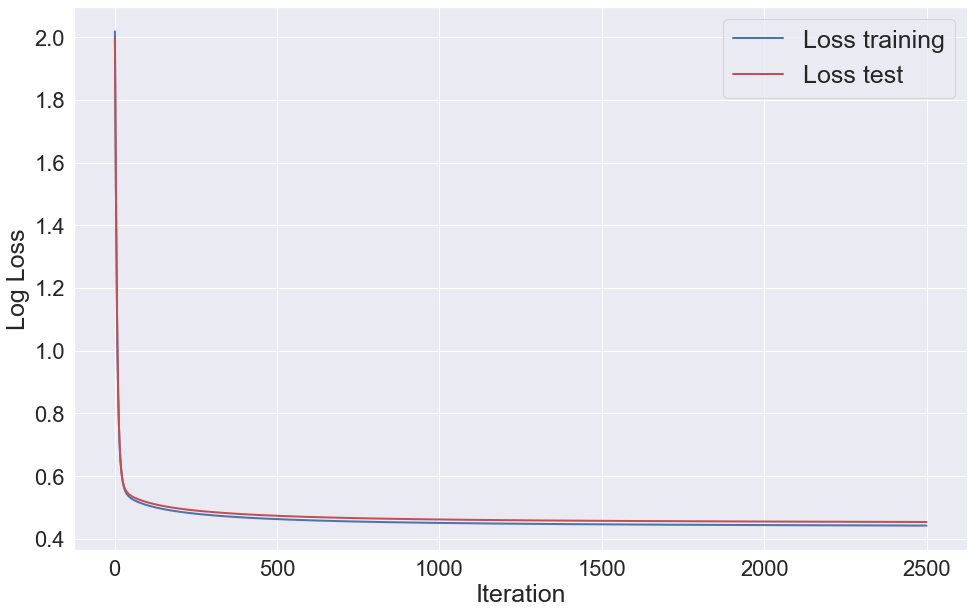

In [16]:
sns.set(font_scale=2)
plt.figure(figsize=([16,10]))
plt.plot(axis, cost_train, 'b', label='Loss training', linewidth=2)
plt.plot(axis, cost_test, 'r', label='Loss test', linewidth=2)
plt.legend(fontsize=25)
plt.ylabel('Log Loss',fontsize=25)
plt.xlabel('Iteration',fontsize=25)
plt.show()

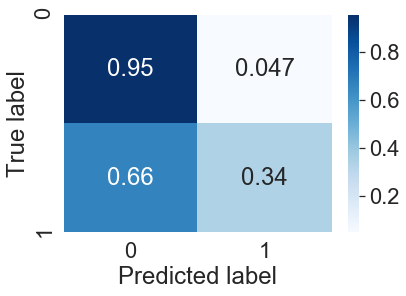

In [17]:
sns.set(font_scale=2)
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show()      


# Accuracy. 
Både egen kode og tester med scikit. 

In [18]:
print(accuracy_train, '% Training accuracy')
print(accuracy_test, '% Test accuracy')
print(f1_train, '% Training f1 score')
print(f1_test, '% Test f1 score')

81.74333333333334 % Training accuracy
81.64666666666668 % Test accuracy
0.45042536337009037 % Training f1 score
0.4479846027103666 % Test f1 score


# Egen logistisk regresjon med stokastisk gradient descent

In [19]:
eta = 0.1 # learning rate
Niter=2500
k=5
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)
classified = dict()
norm = np.zeros([2,2])
accuracy_train = float()
accuracy_test = float()
f1_train = float()
f1_test = float()

for i in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=i]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=i]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[i]
    ytest  = y_folds[i]
    
    logreg = lr.LOGREG(eta=0.1, doplot = False, doprint=False)
    cost_test, cost_train, axis = logreg.fit(xtrain, ytrain, xtest, ytest, Niter, batch_size=int(len(y_new)/20), solver='sgd')
    
    classified=logreg.predict(xtest)
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
    
    classified=logreg.predict(xtrain)   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)
    
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k


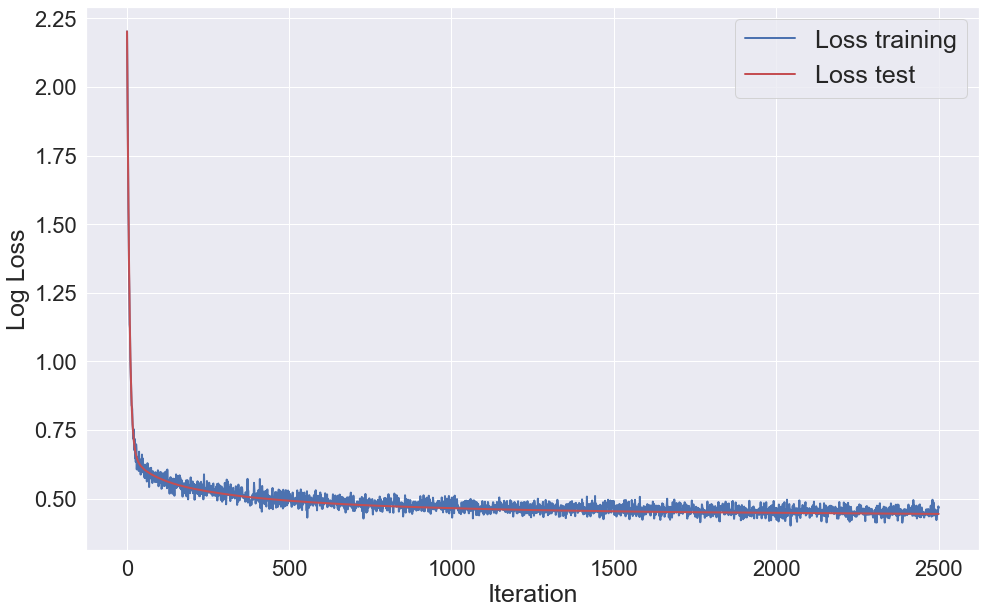

In [20]:
plt.figure(figsize=([16,10]))
plt.plot(axis, cost_train, 'b', label='Loss training', linewidth=2)
plt.plot(axis, cost_test, 'r', label='Loss test', linewidth=2)
plt.legend(fontsize=25)
plt.ylabel('Log Loss',fontsize=25)
plt.xlabel('Iteration',fontsize=25)
plt.show()

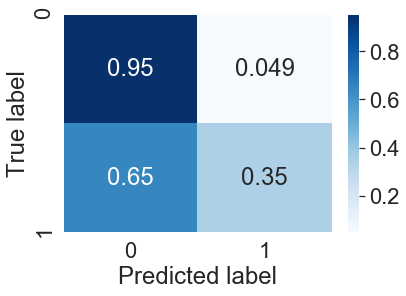

In [22]:
sns.set(font_scale=2)
fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show() 

In [23]:
print(accuracy_train, '% Training accuracy')
print(accuracy_test, '% Test accuracy')
print(f1_train, '% Training f1 score')
print(f1_test, '% Test f1 score')

81.84083333333334 % Training accuracy
81.75666666666666 % Test accuracy
0.45952913637476955 % Training f1 score
0.4571738100468523 % Test f1 score


In [24]:

model = LogisticRegression()
model.fit(xtrain, ytrain)
predicted_classes = model.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_
log_loss(ytrain, predicted_classes)

print(accuracy, '% Training Accuracy')


predicted_classes = model.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),predicted_classes)
accuracy = accuracy * 100
parameters = model.coef_
log_loss(ytest, predicted_classes)

print(accuracy, '% Test Accuracy')

C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


82.07083333333334 % Training Accuracy
82.43333333333334 % Test Accuracy


# C) 
Neural Network. 

In [37]:
epochs=1000
batch_size=int(len(ytrain)/20)
n_features=x.shape[1]
etavec = np.logspace(-6, -1, 6)
lmbvec = np.logspace(-6, -1, 6)
lmbvec[0]=0

activation = [lrf.relu, lrf.sigmoid, lrf.sigmoid]
derivative = [lrf.relu_deriv, lrf.sigmoid_deriv, lrf.sigmoid_deriv]

train_accuracy = np.zeros((len(etavec), len(lmbvec)))
y_folds, x_folds = lrf.k_fold_reshaper(k,y_new,x_new,shuffle=True)
norm = np.zeros([2,2])
accuracy_train = np.zeros((len(etavec), len(lmbvec)))
accuracy_test = np.zeros((len(etavec), len(lmbvec)))
f1_train = np.zeros((len(etavec), len(lmbvec)))
f1_test = np.zeros((len(etavec), len(lmbvec)))
test_loss = np.zeros((len(etavec), len(lmbvec)))
test_f1 = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):
        
        for kf in range(k):
            xtrain = x_folds[np.arange(len(x_folds))!=kf]      # Featch all but the i-th element
            xtrain = np.concatenate(xtrain,axis=0)
            ytrain = y_folds[np.arange(len(y_folds))!=kf]
            ytrain = np.concatenate(ytrain,axis=0)
            xtest  = x_folds[kf]
            ytest  = y_folds[kf]
            
            np.random.seed(2019)
            neural_net = nn.ANN(lmb=lmb, bias=0, eta=etas,early_stop_tol = 10e-04,\
                                early_stop_nochange=200, mode = 'classification', regularization = 'l1')            
            neural_net.add_layers(n_features=[91,50,20], n_neurons = [50,20,1] , n_layers=3)

            neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative \
                             ,xtest,ytest, verbose=False)

            pred = neural_net.feed_out(xtest, activation)
            test_loss[i,j] +=  lrf.cost_log_ols(pred.ravel(),ytest.T)
            test_f1[i,j] +=  f1_score(ytest, np.round(pred))           
            
            classified=np.round(pred)
            
            accuracy_test[i,j] += 100*np.sum(classified==ytest)/len(classified)
            f1_test[i,j] += f1_score(ytest, classified)
            norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
            
            classified=np.round(neural_net.feed_out(xtrain, activation))   
            accuracy_train[i,j] += 100*np.sum(classified==ytrain)/len(classified)
            f1_train[i,j] += f1_score(ytrain, classified)
        print('test loss for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', test_loss [i,j]/k)

norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k
test_loss = test_loss/k

test loss for η = 1e-06 & λ = 0.0 = 0.8578219401360851
test loss for η = 1e-06 & λ = 1e-05 = 0.8578219401928526
test loss for η = 1e-06 & λ = 0.0001 = 0.8578219407037533
test loss for η = 1e-06 & λ = 0.001 = 0.8578219458128021
test loss for η = 1e-06 & λ = 0.01 = 0.8578219969068185
test loss for η = 1e-06 & λ = 0.1 = 0.857822508199958
test loss for η = 1e-05 & λ = 0.0 = 0.856270317480813
test loss for η = 1e-05 & λ = 1e-05 = 0.8562703179219749
test loss for η = 1e-05 & λ = 0.0001 = 0.8562703218924685
test loss for η = 1e-05 & λ = 0.001 = 0.856270361601349
test loss for η = 1e-05 & λ = 0.01 = 0.8562707590843537
test loss for η = 1e-05 & λ = 0.1 = 0.8562747734536102
test loss for η = 0.0001 & λ = 0.0 = 0.796240641237298
test loss for η = 0.0001 & λ = 1e-05 = 0.7962405722302757
test loss for η = 0.0001 & λ = 0.0001 = 0.7962399517542473
test loss for η = 0.0001 & λ = 0.001 = 0.7962338054141929
test loss for η = 0.0001 & λ = 0.01 = 0.7961782174685758
test loss for η = 0.0001 & λ = 0.1 = 0.7

C:\Users\vemundst\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


test loss for η = 0.01 & λ = 0.1 = 0.7768790838895534
test loss for η = 0.1 & λ = 0.0 = 0.7316167618383158
test loss for η = 0.1 & λ = 1e-05 = 0.7318249181614596
test loss for η = 0.1 & λ = 0.0001 = 0.7324877058695761
test loss for η = 0.1 & λ = 0.001 = 0.7360213547545646
test loss for η = 0.1 & λ = 0.01 = 0.7629375432563745
test loss for η = 0.1 & λ = 0.1 = 0.7613187215983194


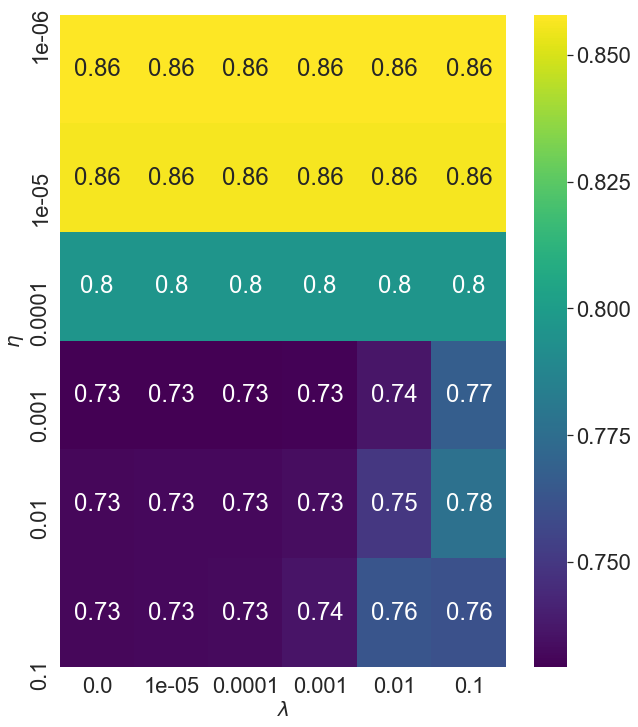

In [38]:
yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(test_loss, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
#ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$", fontsize=20)
ax.set_xlabel("$\lambda$", fontsize=20)
tmp = np.arange(len(etavec))+0.5
tmp[0] = 0
tmp[-1]+=0.5
ax.set_yticks(tmp)
tmp = np.arange(len(lmbvec)) + 0.5
ax.set_xticks(tmp)
plt.show()

In [42]:
best_eta_index, best_lmb_index = np.where(test_loss == np.min(test_loss))
best_eta,best_lmb = etavec[best_eta_index], lmbvec[best_lmb_index] 
print('eta=',best_eta)
print('lmb=',best_lmb)

eta= [0.001]
lmb= [0.]


In [52]:
epochs=1000

best_eta = 0.1

norm = np.zeros([2,2])
accuracy_test = 0
f1_test = 0 
accuracy_train = 0
f1_train = 0 
for kf in range(k):
    xtrain = x_folds[np.arange(len(x_folds))!=kf]      # Featch all but the i-th element
    xtrain = np.concatenate(xtrain,axis=0)
    ytrain = y_folds[np.arange(len(y_folds))!=kf]
    ytrain = np.concatenate(ytrain,axis=0)
    xtest  = x_folds[kf]
    ytest  = y_folds[kf]
            
    np.random.seed(2019)
    neural_net = nn.ANN(lmb=best_lmb, bias=0, eta=best_eta,early_stop_tol = 0,\
                                early_stop_nochange=200, mode = 'classification', regularization = 'l1')            
    neural_net.add_layers(n_features=[91,50,20], n_neurons = [50,20,1] , n_layers=3)

    neural_net.train(epochs, batch_size, xtrain,ytrain,activation,derivative \
                             ,xtest,ytest, verbose=True)

    pred = neural_net.feed_out(xtest, activation)
    test_loss[i,j] +=  lrf.cost_log_ols(pred.ravel(),ytest.T)
    test_f1[i,j] +=  f1_score(ytest, np.round(pred))           
            
    classified=np.round(pred)
            
    accuracy_test += 100*np.sum(classified==ytest)/len(classified)
    f1_test += f1_score(ytest, classified)
    norm += fx.norm_confusion_matrix(ytest, classified, normalize=True)
            
    classified=np.round(neural_net.feed_out(xtrain, activation))   
    accuracy_train += 100*np.sum(classified==ytrain)/len(classified)
    f1_train += f1_score(ytrain, classified)
    
norm = norm/k
accuracy_train = accuracy_train/k
accuracy_test = accuracy_test/k
f1_train = f1_train/k
f1_test = f1_test/k
test_loss = test_loss/k
cost_test, cost_train = neural_net.costs()

Epoch 1 loss 0.7986885930394363
Epoch 2 loss 0.7708430929435935
Epoch 3 loss 0.7556279105010487
Epoch 4 loss 0.7464507696020486
Epoch 5 loss 0.7410472786292
Epoch 6 loss 0.7371462727344048
Epoch 7 loss 0.7343922512262199
Epoch 8 loss 0.7325597501397337
Epoch 9 loss 0.7314049399138941
Epoch 10 loss 0.7307169528490288
Epoch 11 loss 0.7299854039052275
Epoch 12 loss 0.7297642209188993
Epoch 13 loss 0.7293463707823169
Epoch 14 loss 0.7294096497182812
Epoch 15 loss 0.7298852146039924
Epoch 16 loss 0.7298245683566714
Epoch 17 loss 0.7302186841424112
Epoch 18 loss 0.7308625750137918
Epoch 19 loss 0.7312877591054039
Epoch 20 loss 0.7317043865368076
Epoch 21 loss 0.7320042008275414
Epoch 22 loss 0.7326409577180226
Epoch 23 loss 0.7331468738513939
Epoch 24 loss 0.7337528726470728
Epoch 25 loss 0.7347364297069714
Epoch 26 loss 0.7357350518631282
Epoch 27 loss 0.7362298971619369
Epoch 28 loss 0.7370341399200018
Epoch 29 loss 0.7373890065478252
Epoch 30 loss 0.7380763510808102
Epoch 31 loss 0.738216

Epoch 247 loss 0.7309983054701545
Epoch 248 loss 0.7307096445558036
Epoch 249 loss 0.7309695541427601
Epoch 250 loss 0.730462190058505
Epoch 251 loss 0.7312100752758273
Epoch 252 loss 0.7312552321494753
Epoch 253 loss 0.7306363899054908
Epoch 254 loss 0.7306039688041617
Epoch 255 loss 0.7312270468588138
Epoch 256 loss 0.7310772236352499
Epoch 257 loss 0.7311735168044137
Epoch 258 loss 0.7308962729402694
Epoch 259 loss 0.7311970502513565
Epoch 260 loss 0.730588672850348
Epoch 261 loss 0.7308777726207631
Epoch 262 loss 0.7308585178703472
Epoch 263 loss 0.7306885647700745
Epoch 264 loss 0.7304212520581193
Epoch 265 loss 0.7301981315978936
Epoch 266 loss 0.7303013780146685
Epoch 267 loss 0.7307457733758501
Epoch 268 loss 0.7309173468840439
Epoch 269 loss 0.7307328305343993
Epoch 270 loss 0.7308336171565115
Epoch 271 loss 0.7312901032007427
Epoch 272 loss 0.7314316927708588
Epoch 273 loss 0.7316190774339135
Epoch 274 loss 0.7307344273558332
Epoch 275 loss 0.7307196439812128
Epoch 276 loss 0

Epoch 125 loss 0.7357141936108936
Epoch 126 loss 0.7354413173039545
Epoch 127 loss 0.7353119875525058
Epoch 128 loss 0.7356168837758104
Epoch 129 loss 0.7355819653506532
Epoch 130 loss 0.7358142259975275
Epoch 131 loss 0.7353866101073636
Epoch 132 loss 0.7351775473612552
Epoch 133 loss 0.7351901679600845
Epoch 134 loss 0.7353340804191155
Epoch 135 loss 0.7356442607661491
Epoch 136 loss 0.7354239139417088
Epoch 137 loss 0.7355518516126132
Epoch 138 loss 0.735264106094494
Epoch 139 loss 0.7355442537824112
Epoch 140 loss 0.7350923595462739
Epoch 141 loss 0.7350776972843813
Epoch 142 loss 0.735449562392023
Epoch 143 loss 0.7352084484866056
Epoch 144 loss 0.7345911741853671
Epoch 145 loss 0.7345926973118242
Epoch 146 loss 0.7342507582790918
Epoch 147 loss 0.7344464906876541
Epoch 148 loss 0.7344061929638306
Epoch 149 loss 0.7341129852530148
Epoch 150 loss 0.7342389286534314
Epoch 151 loss 0.7344929233632136
Epoch 152 loss 0.7350625621940121
Epoch 153 loss 0.7347903557727947
Epoch 154 loss 0

Epoch 72 loss 0.7405869804603952
Epoch 73 loss 0.7400525602352634
Epoch 74 loss 0.7400698473252235
Epoch 75 loss 0.738999234496147
Epoch 76 loss 0.7392498071780335
Epoch 77 loss 0.738563214582072
Epoch 78 loss 0.738464972394695
Epoch 79 loss 0.7387048654547522
Epoch 80 loss 0.7392325855445819
Epoch 81 loss 0.7389593924322398
Epoch 82 loss 0.7381186317793366
Epoch 83 loss 0.7371968347531944
Epoch 84 loss 0.7369117138826347
Epoch 85 loss 0.7375906945100755
Epoch 86 loss 0.736938821512101
Epoch 87 loss 0.737291368934353
Epoch 88 loss 0.7366534558349496
Epoch 89 loss 0.7368800769909313
Epoch 90 loss 0.7360590862848203
Epoch 91 loss 0.7357816888254206
Epoch 92 loss 0.735748959416021
Epoch 93 loss 0.7358587577146849
Epoch 94 loss 0.7355594920858981
Epoch 95 loss 0.7356861378367209
Epoch 96 loss 0.7360948811006113
Epoch 97 loss 0.7357952298398883
Epoch 98 loss 0.7355577329055555
Epoch 99 loss 0.7351995345205405
Epoch 100 loss 0.7348973523800028
Epoch 101 loss 0.7346867126732567
Epoch 102 loss

Epoch 315 loss 0.7318348498856422
Epoch 316 loss 0.7320177198529776
Epoch 317 loss 0.7324893654324457
Epoch 318 loss 0.7321179844026732
Epoch 319 loss 0.7321485445162622
Epoch 320 loss 0.731772045230031
Epoch 321 loss 0.7313789645272414
Epoch 322 loss 0.7315322528297435
Epoch 323 loss 0.7317674087381696
Epoch 324 loss 0.7321296386628119
Epoch 325 loss 0.7321180704909004
Epoch 326 loss 0.7325224635440227
Epoch 327 loss 0.7324866129745263
Epoch 328 loss 0.732536100337749
Epoch 329 loss 0.7319569252652472
Epoch 330 loss 0.7318444058722858
Epoch 331 loss 0.7320205408202044
Epoch 332 loss 0.7319988730234178
Epoch 333 loss 0.7322164655696787
Epoch 334 loss 0.7322962331376278
Epoch 335 loss 0.7323390624886521
Epoch 336 loss 0.7320311109983034
Epoch 337 loss 0.731805544109426
Epoch 338 loss 0.731695490548691
Epoch 339 loss 0.7315929055142104
Epoch 340 loss 0.7317781760482533
Epoch 341 loss 0.7322634243947179
Epoch 342 loss 0.7319264607547331
Epoch 343 loss 0.7317801744816185
Epoch 344 loss 0.7

Epoch 204 loss 0.7304889811729485
Epoch 205 loss 0.7302344649499097
Epoch 206 loss 0.7303668220680363
Epoch 207 loss 0.7304107999900546
Epoch 208 loss 0.7303392085069614
Epoch 209 loss 0.7302354362118264
Epoch 210 loss 0.7308659947108821
Epoch 211 loss 0.7305086272060269
Epoch 212 loss 0.7307793717243021
Epoch 213 loss 0.7304771534556647
Epoch 214 loss 0.7309178281853667
Epoch 215 loss 0.7310004140631166
Epoch 216 loss 0.730991948190489
Epoch 217 loss 0.7314489850943067
Epoch 218 loss 0.7311337477676698
Epoch 219 loss 0.7306808386315397
Epoch 220 loss 0.7306271395403613
Epoch 221 loss 0.7306233809661535
Epoch 222 loss 0.73043582881791
Epoch 223 loss 0.7301507945441017
Epoch 224 loss 0.7301561768771071
Epoch 225 loss 0.7302327185829997
Epoch 226 loss 0.7303510547896628
Epoch 227 loss 0.7300848806704731
Epoch 228 loss 0.7298584420931851
Epoch 229 loss 0.7300892301319739
Epoch 230 loss 0.7301901512812897
Epoch 231 loss 0.7300312522421851
Epoch 232 loss 0.7298592438412859
Epoch 233 loss 0.

Epoch 156 loss 0.7310041068436464
Epoch 157 loss 0.7310212017347244
Epoch 158 loss 0.7312672405657112
Epoch 159 loss 0.731017719687085
Epoch 160 loss 0.7307677413848765
Epoch 161 loss 0.7309647557932858
Epoch 162 loss 0.7318506715382569
Epoch 163 loss 0.7313396091606202
Epoch 164 loss 0.7315437338621557
Epoch 165 loss 0.7312543533590011
Epoch 166 loss 0.7318234828317535
Epoch 167 loss 0.7316031957465705
Epoch 168 loss 0.7319553105256512
Epoch 169 loss 0.731354306548123
Epoch 170 loss 0.7314716929903098
Epoch 171 loss 0.731530879193055
Epoch 172 loss 0.7314567087002484
Epoch 173 loss 0.7309294607008978
Epoch 174 loss 0.7311344350769868
Epoch 175 loss 0.7314248629740256
Epoch 176 loss 0.7318720960468584
Epoch 177 loss 0.7320475534216812
Epoch 178 loss 0.7318572465859527
Epoch 179 loss 0.7318696489575915
Epoch 180 loss 0.7316917393073493
Epoch 181 loss 0.7315927454717615
Epoch 182 loss 0.7313795235231358
Epoch 183 loss 0.7314986587208835
Epoch 184 loss 0.7314239663246981
Epoch 185 loss 0.

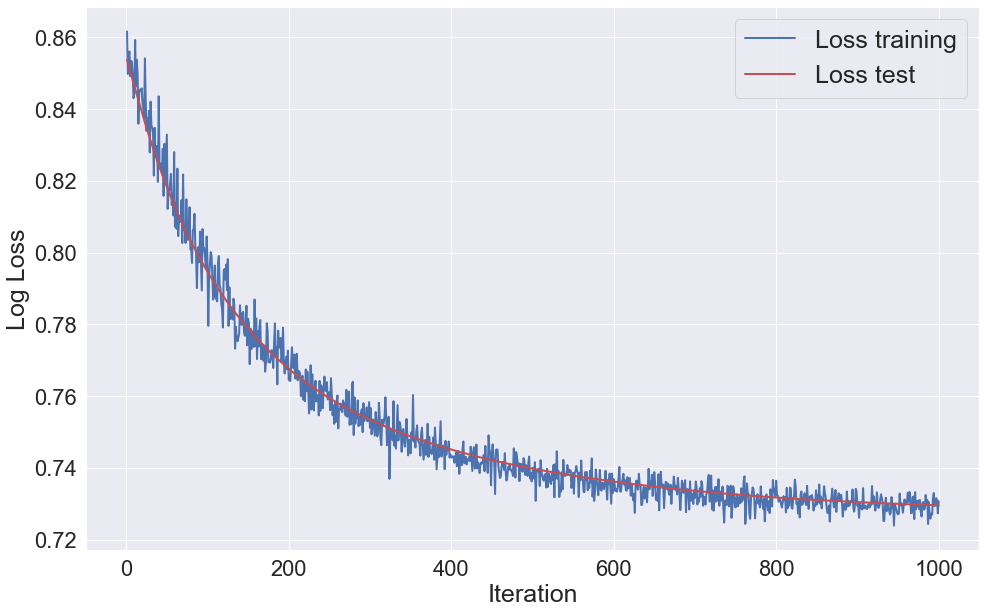

In [44]:
cost_test, cost_train = neural_net.costs()
plt.figure(figsize=([16,10]))
axis = np.arange(len(cost_train))+1
plt.plot(axis, cost_train, 'b', label='Loss training', linewidth=2)
plt.plot(axis, cost_test, 'r', label='Loss test', linewidth=2)
plt.legend(fontsize=25)
plt.ylabel('Log Loss',fontsize=25)
plt.xlabel('Iteration',fontsize=25)
plt.show()

In [51]:
print(f1_test)
print(accuracy_test)

1
2
3
4
[[1 2]
 [3 4]]


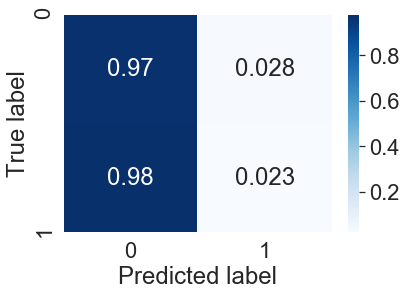

In [45]:

fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show() 


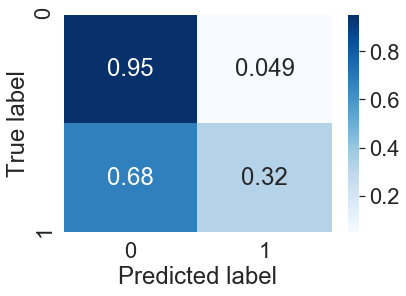

In [33]:

fig=sns.heatmap(norm, annot=True, cmap=plt.cm.Blues,yticklabels=['0','1'], xticklabels=['0','1'])
fig.set_yticks([0, 2]) 
fig.set_xticks([0.5, 1.5])
fig.set(xlabel='Predicted label', ylabel='True label')
plt.show() 


In [22]:
from sklearn.neural_network import MLPClassifier
# by default MLPClassifier employes l2 regularization


#print("Test set score: %f" % mlp.score(xtest, ytest))
epochs=1000
batch_size=500
n_features=x.shape[1]
etavec = np.logspace(-4, -1, 4)
lmbvec = np.logspace(-7, -3, 5)
lmbvec[0]=0


train_accuracy = np.zeros((len(etavec), len(lmbvec)))
for i, etas in enumerate(etavec):
    for j, lmb in enumerate(lmbvec):
        mlp = MLPClassifier(hidden_layer_sizes=(50,20,), max_iter=2000, alpha=lmb,
                    solver='sgd', verbose=0, tol=1e-4,batch_size=500, random_state=1,
                    learning_rate_init=etas)

        mlp.fit(xtrain, ytrain.ravel())
        print("Training set score: %f" % mlp.score(xval, yval))
        pred = mlp.predict(xval)
        train_accuracy[i,j] =  lrf.cost_log_ols(pred.ravel(),yval.T)
        print('Validation f1_score for', '\u03B7 =', etas, '&', '\u03BB =', lmb, '=', train_accuracy [i,j])



Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 0.0 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 1e-06 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 1e-05 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 0.0001 = 0.637097362413115
Training set score: 0.706325
Validation f1_score for η = 0.0001 & λ = 0.001 = 0.637097362413115
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 0.0 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 1e-06 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 1e-05 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 0.0001 = 0.6274553591914801
Training set score: 0.718373
Validation f1_score for η = 0.001 & λ = 0.001 = 0.6274553591914801
Training set score: 0.673946
Validation f1

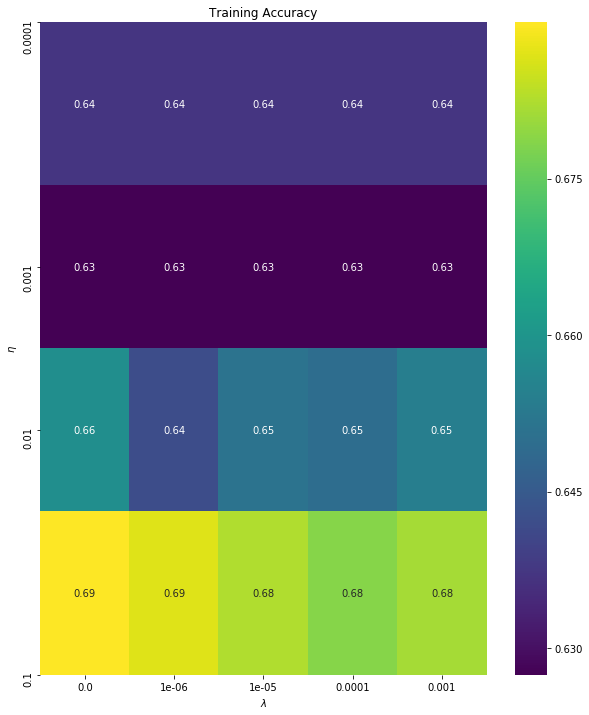

In [23]:
import seaborn as sns
train_accuracy[np.isnan(train_accuracy)]=2

yticklabels = etavec
xticklabels = lmbvec
fig, ax = plt.subplots(figsize = (10, 12))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis",\
            yticklabels=yticklabels, xticklabels=xticklabels)
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
tmp = np.arange(len(etavec))+0.5
tmp[0] = 0
tmp[-1]+=0.5
ax.set_yticks(tmp)
tmp = np.arange(len(lmbvec)) + 0.5
ax.set_xticks(tmp)
plt.show()

In [24]:
pred = mlp.predict(xtest)
accuracy = accuracy_score(ytest.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)
print(f1_score(ytest, pred)) 

cm = confusion_matrix(ytest , pred)
print(cm)

66.17702448210923
0.6801994301994302
[[802 573]
 [325 955]]


In [25]:
pred = mlp.predict(xtrain)
accuracy = accuracy_score(ytrain.flatten(),pred)
accuracy = accuracy * 100
print(accuracy)

cm = confusion_matrix(ytrain , pred)
print(cm)

75.83162880826785
[[3137 1473]
 [ 772 3907]]


# Cancer data

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

xtrain,ytrain = load_breast_cancer(return_X_y=True)
scaler = MinMaxScaler()
indx = np.arange(xtrain.shape[1])
scaler.fit(xtrain[:,indx])
xtrain = scaler.transform(xtrain[:,indx])
ytrain=ytrain.reshape([len(ytrain),1])